# Algebra Lineal + Machine Learning

- Machine Learning, o aprendizaje automático, es una rama de las ciencias de la computación que hace uso de técnicas estadísticas (y a veces no tan estadísticas) que busca que las computadoras "aprendan"
- Dicho de una forma un poco menos vendehumo: que sean capaces de generalizar modelos o bien de ayudarnos en el descubrimiento de conocimiento y tendencias sobre los datos.

## ¿Por qué lo damos acá?

- Es una buena forma de mostrar una de las aplicaciones de algebra lineal en uno de los campos más disruptivos e innovadores de la actualidad.

### ¿Por qué lo doy yo?

- Porque a Filippo le pareció una buena idea. Vamos a descubrir si es una buena idea.
- Vamos a implementar un algoritmo muy sencillo (y bastante poco eficiente en términos computacionales) conocido como **[K Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)**. A grandes rasgos, *consiste en una **votación** de los **k** vecinos más cercanos sobre un **data point (¡o vector!)** desconocido.*

Véase esta imagen:

![KNN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/279px-KnnClassification.svg.png)

Tenemos en total **11 puntos** que pertenecen a R^2 que podemos representar como puntos (x_1, x_2). El espacio en el que nos manejamos puede ser R^2 como tranquilamente puede serlo R^n.

- 5 puntos que pertenecen a una categoría **azul**.
- 5 puntos que pertenecen a una categoría **roja**.
- 1 punto que no conocemos (el verde).

Nuestro objetivo es **clasificar** este punto, y nuestra mejor estimación a través de KNN (K Nearest Neighbors) es a través de una *votación* a partir de los **k** puntos más cercanos al punto verde. En este caso, vamos a suponer que nos alcanza con la opinión de **3** vecinos, es decir que k = 3.

Siendo k = 3 podemos apreciar que hay 3 vecinos alrededor del punto verde:
- Un punto azul que está bastante lejos.
- **Dos puntos rojos que están muy cerca**.

Como tenemos k = 3 y 2 de los 3 puntos que tomamos en cuenta en base a su cercanía al punto verde, *conlcuimos que el punto desconocido, el punto verde, pertenece a la categoría **roja**.

Hasta ahora no suena tan poderoso esto, pero su poder nace de la **capacidad de abstraer los algoritmos de machine learning a diferentes situaciones**. Vamos a hacer algo más copado: hagamos que la computadora lea dígitos escritos a mano mediante el reconocimiento de imagenes. Como podrán imaginar a partir del ejemplo que dí, para que KNN funcione necesitamos *datos pre-clasificados y un dominio bien definido para éstos*. Los voy a pedir prestados de [scikit-learn](http://scikit-learn.org/), una librería muy copada hecha por tipos muy copados. Para esto vamos a usar **Python**.

In [1]:
%matplotlib inline

# Importamos nuestro dataset, o nuestro conjunto de datos.
from sklearn.datasets import load_digits
# Los cargamos en una variable.
digits = load_digits()
# Conozcamos las dimensiones de nuestro dataset!
print(digits.data.shape)

(1797, 64)


## ¿Qué tenemos?

- Tenemos 1797 **vectores** de *64* componentes cada uno. ¡Estamos en R^64! Que es equivalente a estar en R^8x8, solamente que las columnas están apiladas.
- En términos menos molestos, estamos manipulando imagenes de 8x8 aplanadas en 64 componentes, que es lo mismo y es más fácil de manejar para lo que vamos a hacer.
- Cada vector representa una imagen en **grayscale**, es decir que no tiene color, si no tonos de grises.
- Veamos cómo se ve una imagen.

<Figure size 432x288 with 0 Axes>

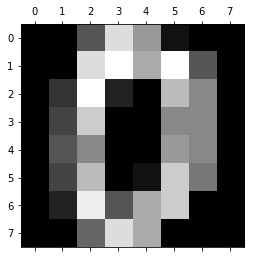

In [2]:
import matplotlib.pyplot as plt
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

## ¿Cómo seguimos?

- En un principio tenemos que definir el concepto de *distancia* entre los puntos, para poder saber qué puntos son los que están más cerca de nuestro candidato a clasificar.
- Por una cuestión de simplicidad (y porque podemos), vamos a usar la **distancia de euclides**, que en términos Filippo-escos es:

*Dados dos puntos q y p pertenecientes a* **R^n** *, definimos a la distancia euclideana entre ellos como:*

(estamos asumiendo que nos encontramos en el dominio de la geometría euclidiana)

![Distancia Euclideana](https://sebastianraschka.com/images/faq/euclidean-distance/eucl-1.png)

- Que para suerte nuestra también podemos escribir con notación vectorial como:

![Distancia Euclideana Piola](https://wikimedia.org/api/rest_v1/media/math/render/svg/367a94a87ddcfd91325bf3023af5ca77a0027e55)

- Oh casualidad que esto lo podemos expresar de la siguiente manera, ¡que lo vimos en clase! (en R^2 porque sino no se entendería nada)

![Distancia Euclideana Gráfico](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/360px-Euclidean_distance_2d.svg.png)

- Cuya raíz cuadrada no es nada más y nada menos que la norma del vector *q - p*.

- Yendo al código, definamos una función para calcular esta distancia.



In [3]:
from math import sqrt
# Definamos una función que nos calcule la distancia euclideana entre dos vectores q y p.
def distancia_euclidiana(q, p):
    '''
    q y p tienen que tener el mismo tamaño, no viene mal asegurarnos que efectivamente sea así mediante una assertion.
    len(x) nos devuelve el tamaño de un vector.
    '''
    assert(len(q) == len(p))
    dimension_vector = len(q) # Como ambos vectores son iguales da lo mismo a quién le pedimos su tamaño.
    d = 0
    for i in range(0, dimension_vector): # Estamos implementando la sumatoria que presentamos justo arriba.
        d += (q[i] - p[i]) ** 2
    return sqrt(d)

# Y para probar: Supongamos que tenemos 2 vectores, q = [1, 2] y p = [2, 1], la distancia euclideana debería ser aprox. 1,414...
print(distancia_euclidiana([1, 2], [2, 1]))

# Probemos también con los vectores de 64 componentes, así me creen que esto anda.
print(distancia_euclidiana(digits.data[0], digits.data[1]))

1.4142135623730951
59.55669567731239


Bastante importante la distancia que poseen, ¿qué digitos serán?

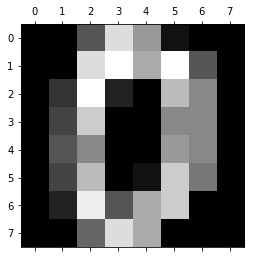

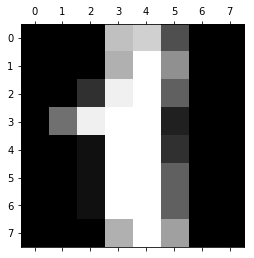

In [4]:
plt.matshow(digits.images[0])
plt.matshow(digits.images[1])
plt.show()

- **Nos está indicando que hay una gran distancia entre el dígito 0 y el dígito 1. ¡Con esto podemos decir que nuestro algoritmo de distancia está efectivamente funcionando!**
- Buenísimo, pero ¿cómo llevamos esto a lo que buscamos lograr?
- Algo muy importante que dije antes y que vale la pena recordar es que estas imagenes están pre-clasificadas, esto significa que sabemos de antemano su valor. Véase:

In [5]:
# Esto corresponde al valor del primer dígito (el primero que mostramos antes)
print(digits.target[0])
# Esto corresponde al valor del segundo dígito (el segundo que mostramos antes)
print(digits.target[1])

0
1


- Confirmado esto, podemos ponernos manos a la obra e implementar nuestro algoritmo K Nearest Neighbors utilizando nuestra función `distancia_euclidiana`.
- Vamos a dividir nuestro dataset en dos:
- Un 75% de los ejemplos los vamos a mantener clasificados y vamos a usarlos como "votantes".
- El otro 25% vamos a hacer de cuenta que no están clasificados y van a recibir la clase que decidan los "votantes".
- Nos vamos a ayudar de una librería para hacer esta división aleatoria y lo menos sesgada posible.

In [6]:
# La librería que nos ayuda nos da esta función train_test_split
from sklearn.model_selection import train_test_split
# Es común denominar a los datos como "X" y a su clasificación como "y".
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

- `X_train` son nuestros votantes.
- `X_test` son nuestros candidatos.
- `y_train` son las categorías de nuestros votantes.
- `y_test` son las categorías de nuestro candidatos (que no vamos a dar conocer)
- Vamos a definir nuestro **K** de **K Nearest Neighbors** como *k = 10*.


In [7]:
k = 10
tamaño_X_train = X_train.shape[0] # 1347 imagenes de digitos
tamaño_X_test = X_test.shape[0] # 450 imagenes de digitos

def calcular_distancias_respecto_a_un_punto(X, clases_X, y):
    '''
    Esta función va a devolver un vector ordenado de todas las distancias euclidianas de todos los puntos contenidos en X respecto al punto y.
    Este vector va a tener como tamaño la TOTALIDAD del conjunto de datos de entrenamiento, es decir, 1347 componentes.
    El vector va a estar ordenado de forma ascendente. Podríamos no ordenarlo y hacerlo un poco más eficiente, pero prefiero hacernos la vida más sencilla.
    Hice una pequeña trampa y agregué como parámetro las clases de X, es decir, las categorías a las que pertenecen los "votantes", y la agregué como tuplas al vector. Esto nos va a servir para
    saber sus categorías, es decir, sus "votos".
    '''
    distancias = [] # Declaramos un vector vacío que vamos a ir llenando.
    tamaño_X = X.shape[0] # Esto es 1347.
    for i in range(0, tamaño_X): # Por cada vector dentro de X, es decir por cada votante, calculemos la distancia euclidiana de ese punto x respecto de y.
        distancias.append((distancia_euclidiana(X[i], y), clases_X[i])) # Vamos populando el vector reutilizando nuestra función de distancia euclidiana.
        
    return sorted(distancias) # sorted() nos devuelve el vector ordenado.

Vayamos paso por paso:

- `calcular_distancias_respecto_a_un_punto(X, y)` recibe dos cosas:
- `X`, que es una **matriz** de 1347x64, es decir una matriz compuesta por 1347 vectores de 64 componentes cada uno.
- `y`, que es un **vector** de 64 componentes.
- Por cada *vector* dentro de `X` calculamos la *distancia euclidiana* entre ese vector e `y`.
- Esta distancia euclidiana se agrega a un nuevo vector `distancias` que posee el cálculo de cada distancia euclidiana entre cada punto `x` E `X` e `y`.
- El vector `distancias` posee 1347 componentes. ¿Por qué? Si hiciésemos el producto interno entre una matrix `X` E R^1347x64 e `y` E R^64, nos daría como resultado un **vector** de 1347 componentes, es decir R^1347. **¡Estamos haciendo nada más y nada menos que eso!**
- Agregué las clases del conjunto de votantes o de entrenamiento a propósito, para después poder usarlas para conocer sus "votos" o categorías a las que pertenecen, dicho más formalmente.
- A partir de este vector *ordenado* que recuperamos, tenemos que elegir los *k* (en este caso *k = 10*) elementos con la distancia más corta respecto al punto o candidato por el que el resto está votando, y estamos asumiendo que la mayoría de los votos representa quién es este punto o candidato desconocido.
- Definamos una función `clasificar(distancias, y)` donde y es el punto a clasificar que en base a esto nos diga la categoría.
- También vamos a definir una nueva función que nos va a permitir corregir estas tuplas que hicimos anteriormente, teniendo ordenadas por distancia todas las clases que nos interesan.
- Por último también vamos a requerir una función que nos asista a calcular la **moda**, o *la clase o voto que más se repite*.

In [8]:
def calcular_moda(votos):
    '''
    Recibe un vector con los k votos más cercanos a nuestro vector candidato y retorna el voto más frecuente junto con cuánta confianza se tiene de que ese voto sea el adecuado.
    Esta confianza no dice qué tan preciso es KNN, si no qué tan seguro está el algoritmo de que efectivamente ese "candidato" se merece esa clasificación.
    '''
    frecuencia = {} # Definimos un diccionario, que es una tabla asociativa. ¿Recuerdan el Hash Table de la primera clase? Es esto, y funciona exactamente como lo dice la guía.
    for voto in votos:
        if voto in frecuencia: # Si encontramos una cuenta ya existente de votos en nuestra tabla, le sumamos un nuevo voto.
            frecuencia[voto] += 1
        else:
            frecuencia[voto] = 1 # Si no, lo inicializamos con su primer voto.
    # Ya armada nuestra tabla, nos fijamos cual es el "candidato" más votado. Esto se puede hacer de muchas formas muy elegantes, pero por una cuestión de ser explícito, lo vamos a implementar.
    from math import inf # Usamos infinito como referencia a algo que no puede existir en la moda, como centinela.
    moda = -inf # La cuenta siempre va a ser mayor que el infinito negativo.
    ganador = None
    for candidato, cuenta in frecuencia.items(): # Por cada fila en nuestra tabla
        if cuenta > moda: # Si la cuenta en esa fila es mayor a la moda actual (la vamos definiendo iterativamente)
            ganador = candidato # El ganador es el candidato de esa cuenta
    confianza = frecuencia[ganador] / k # k está definido por fuera de la función, pero como es todo una gran clausura lo podemos usar igual. Por esto me gusta Jupyter.
    return (ganador, confianza)
        

def separar_votos(distancias):
    '''
    Recibe un vector de tuplas (distancia, clase), y devuelve un vector únicamente de las clases.
    '''
    votos = []
    for _, clase in distancias: # Por cada tupla (distancia, clase), ignoramos la distancia con _ ya que no nos interesa su valor.
        votos.append(clase)
    return votos

def clasificar(X_train, y_train, y_target):
    '''
    Haber ordenado las distancias de forma ascendente nos permite ahora simplemente elegir los primeros 10 votos definidos por k, y la mayoría de estos votos definirá nuestra clasificación.
    Devuelve una tupla compuesta por quien KNN cree que es el "ganador" de esta mayoría por distancia, y con cuánta confianza cree que está en lo correcto.
    '''
    distancias = calcular_distancias_respecto_a_un_punto(X_train, y_train, y_target)
    votos = separar_votos(distancias)[0:k]
    ganador, confianza = calcular_moda(votos)
    return ganador, confianza * 100 # Confianza * 100 para que sea un porcentaje

# Vamos a probar nuestro K Nearest Neighbors a ver qué nos dice respecto del primer punto de prueba que tenemos.
print("El dígito se clasificó como el número: {} con {}% de confianza".format(*clasificar(X_train, y_train, X_test[0]), X_test[0]))

El dígito se clasificó como el número: 6 con 100.0% de confianza


- Genial, ¡ya tenemos nuestro primer dígito clasificado!
- Es muy importante que comprobemos qué tan en lo cierto estamos, veamos cómo se ve este dígito `X_test[0]`
- Para lograr esto tenemos que darle un formato apropiado a este dígito, ya que ahora mismo es un vector de 64 componentes E R^64, y nosotros lo que necesitamos es una matriz de 8x8, es decir M E R^8x8. Nos vamos a ayudar de una librería para hacer esta conversión rápidamente.

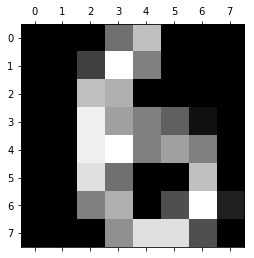

In [9]:
digito = X_test[0].reshape(8, 8) # Transformamos X_test[0] a una matriz de 8x8.
plt.matshow(digito) # Mostramos el dígito

- ¡El dígito es 6! ¡Lo clasificó correctamente!
- A esta altura ya podemos decir que tenemos un clasificador funcionando. Vamos a ver cómo le va con *todos* nuestros datos sin clasificar.
- Acá vamos a usar nuestra carta trampa que es que en realidad sabemos los verdaderos valores de los dígitos dentro de `X_test` para saber si efectivamente nuestro clasificador estuvo en lo correcto o no.

In [10]:
dudosos = []
no_dudosos = []
aciertos = 0
fallos = 0

for i in range(0, X_test.shape[0]): # Por cada valor dentro de nuestros candidatos
    clase, confianza = clasificar(X_train, y_train, X_test[i])
    print("El dígito se clasificó como el número: {} con {}% de confianza".format(clase, confianza))
    if confianza > 50.0:
        no_dudosos.append(X_test[i])
    else:
        dudosos.append(X_test[i])
    # Ya que estamos hagamos una estadística muy básica de cuántos aciertos tuvimos sobre nuestro conjunto de datos de prueba.
    if clase == y_test[i]:
        aciertos += 1
    else:
        fallos += 1
        
total = X_test.shape[0]

print("De {} digitos, el clasificador acertó en {} casos, resultando en un {}% de precisión en la clasificación.".format(total, aciertos, '%.3f'%((aciertos / total)*100)))

El dígito se clasificó como el número: 6 con 100.0% de confianza
El dígito se clasificó como el número: 9 con 100.0% de confianza
El dígito se clasificó como el número: 3 con 100.0% de confianza
El dígito se clasificó como el número: 9 con 10.0% de confianza
El dígito se clasificó como el número: 2 con 100.0% de confianza
El dígito se clasificó como el número: 2 con 10.0% de confianza
El dígito se clasificó como el número: 5 con 100.0% de confianza
El dígito se clasificó como el número: 2 con 100.0% de confianza
El dígito se clasificó como el número: 5 con 100.0% de confianza
El dígito se clasificó como el número: 2 con 100.0% de confianza
El dígito se clasificó como el número: 1 con 100.0% de confianza
El dígito se clasificó como el número: 9 con 100.0% de confianza
El dígito se clasificó como el número: 4 con 100.0% de confianza
El dígito se clasificó como el número: 0 con 100.0% de confianza
El dígito se clasificó como el número: 4 con 100.0% de confianza
El dígito se clasificó como

- ¡Abbiamo finito! Terminamos un clasificador que puede reconocer imagenes y decirnos con bastante confianza en general qué digito es.
- Podemos visualizar las imagenes de los digitos abajo, los "dudosos" son los que nuestro algoritmo predijo con menos de 50% de confianza, y los "no dudosos" su complemento.

In [11]:
def mostrar_imagenes(resultados):
    for resultado in resultados:
        plt.matshow(resultado.reshape(8, 8))
        
#mostrar_imagenes(dudosos)
#mostrar_imagenes(no_dudosos)

# Conclusiones
- KNN es un algoritmo de machine learning muy simple, y no es muy eficiente.
- Para los amigos KNN es un algoritmo de clasificación que, sin técnicas de optimización directas, está en el orden de complejidad de O(N*M) **para la evaluación, ya que en nuestra implementación no posee una fase de entrenamiento**.
- Es un algoritmo no paramétrico, y si bien hay varios que son así, la poca eficiencia computacional de KNN se debe a su condición de *fuerza bruta* para clasificar. Estamos calculando la distancia de *todos* los puntos del conjunto de datos para clasificar un único caso, y lo repetimos tantas veces como casos hayan, es por eso que decimos que no es para nada eficiente y existen opciones mucho mejores, tales como la Regresión Logística, los árboles de decisión, las redes neuronales y muchísimos otros más. Hay varias formas de mejorar este tiempo, pero no está dentro del alcance de esta presentación.